In [71]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time

In [72]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [73]:
#add lat and long to a list
coordinates = list(lats_lngs)

In [74]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [75]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [76]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=153b8138702af9983a5fc1d8f5f5e51e


In [77]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1  #record counts up to 50 for groups of 50 cities starting at 1
set_count = 1   #set refers to batch sets of 50 cities

# Loop through all the cities in the list. (i- integer for the city #) makes tuple
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city   # "&q=" is a query parameter when looking

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-uda
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | ust-kulom
Processing Record 4 of Set 1 | dujuma
City not found. Skipping...
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | balbalan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | ozinki
Processing Record 11 of Set 1 | grenada
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | matadi
Processing Record 16 of Set 1 | kindu
Processing Record 17 of Set 1 | kidal
Processing Record 18 of Set 1 | tabora
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | phan rang
City not found. Skipping...
Processing Record 22 o

Processing Record 38 of Set 4 | grande-riviere
City not found. Skipping...
Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | bilibino
Processing Record 42 of Set 4 | san lazaro
Processing Record 43 of Set 4 | hirado
Processing Record 44 of Set 4 | vice
Processing Record 45 of Set 4 | sheridan
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | stepanov
Processing Record 49 of Set 4 | shelby
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | bolshoy tsaryn
City not found. Skipping...
Processing Record 2 of Set 5 | igualada
Processing Record 3 of Set 5 | pietarsaari
Processing Record 4 of Set 5 | sambava
Processing Record 5 of Set 5 | kohlu
Processing Record 6 of Set 5 | makakilo city
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | ust-kuyga
Processing Record 9 of Set 5 | shelburne
Processing Record 10 of Set 5 | so

Processing Record 32 of Set 8 | manggar
Processing Record 33 of Set 8 | palmer
Processing Record 34 of Set 8 | ladario
Processing Record 35 of Set 8 | corsicana
Processing Record 36 of Set 8 | camocim
Processing Record 37 of Set 8 | juan lacaze
Processing Record 38 of Set 8 | reforma
Processing Record 39 of Set 8 | monchegorsk
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | caramay
Processing Record 43 of Set 8 | sindand
City not found. Skipping...
Processing Record 44 of Set 8 | nantucket
Processing Record 45 of Set 8 | nalut
Processing Record 46 of Set 8 | kashira
Processing Record 47 of Set 8 | alamosa
Processing Record 48 of Set 8 | aksarka
Processing Record 49 of Set 8 | ruidoso
Processing Record 50 of Set 8 | santa maria da vitoria
Processing Record 1 of Set 9 | vrangel
Processing Record 2 of Set 9 | ionia
Processing Record 3 of Set 9 | manoel urbano
Processing Record 4 of Set 9 | ambatofinandrahana
Processing Recor

Processing Record 21 of Set 12 | riviere-au-renard
Processing Record 22 of Set 12 | colesberg
Processing Record 23 of Set 12 | idah
Processing Record 24 of Set 12 | litoral del san juan
City not found. Skipping...
Processing Record 25 of Set 12 | san julian
Processing Record 26 of Set 12 | contamana
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | shimoda
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 31 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 32 of Set 12 | longyearbyen
Processing Record 33 of Set 12 | camrose
Processing Record 34 of Set 12 | loandjili
Processing Record 35 of Set 12 | mazamari
Processing Record 36 of Set 12 | tabou
Processing Record 37 of Set 12 | komsomolskiy
Processing Record 38 of Set 12 | salekhard
Processing Record 39 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 40 of Set 12 | sembe
Process

In [78]:
len(city_data)

595

In [79]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Uda,RU,2020-05-10 04:08:39,54.17,103.03,61.43,46,100,16.24
1,Aasiaat,GL,2020-05-10 04:08:39,68.71,-52.87,27.27,95,99,8.68
2,Ust-Kulom,RU,2020-05-10 03:59:17,61.69,53.69,55.74,84,13,1.77
3,Balbalan,PH,2020-05-10 04:08:40,17.44,121.20,82.22,65,48,3.36
4,Ushuaia,AR,2020-05-10 04:06:21,-54.80,-68.30,41.00,86,30,1.48
5,Puerto Ayora,EC,2020-05-10 03:59:47,-0.74,-90.35,77.00,93,6,1.99
6,Naze,JP,2020-05-10 03:59:10,28.37,129.48,75.20,94,75,13.87
7,Ozinki,RU,2020-05-10 04:08:40,51.18,49.68,54.00,70,0,14.23
8,Grenada,ES,2020-05-10 04:08:41,37.19,-3.61,53.60,81,75,4.70
9,Kavaratti,IN,2020-05-10 04:08:41,10.57,72.64,89.60,66,20,4.70


In [80]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [82]:
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/09/20'

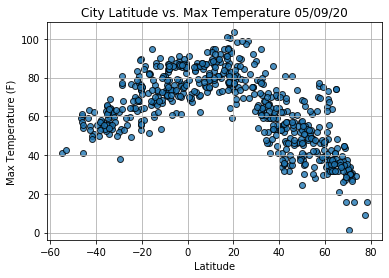

In [83]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

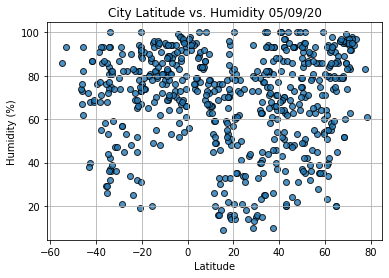

In [84]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

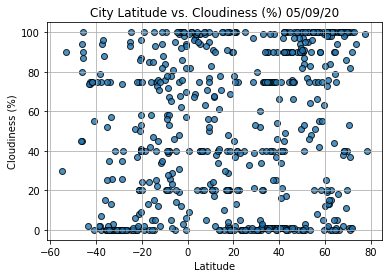

In [85]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

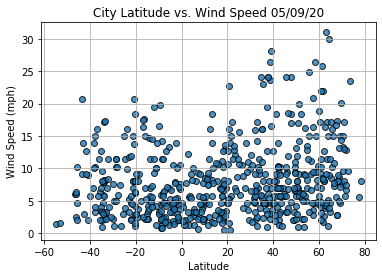

In [86]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()